In [5]:
import pysftp
import os 
import numpy as np
import pandas as pd
import numpy as np

from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from dotenv import load_dotenv   #for python-dotenv method
from datetime import datetime

load_dotenv() 

Hostname = "eepc-0184.bath.ac.uk"
Username = "jmdomd20"
Password = os.environ.get('PASSWORD')

In [6]:
# =============================================================================
# Downloading data from sftp
# Parameters: 
# Grid Size: 125km
# Source: AIRS
# Hemisphere: Northern
# Data Field: tp, bg, a, ha, k, l, m, mfx, mfy
# Daytime: Night
# Altitude: 1 (36km)
# =============================================================================
grid = map_grid(grid_size='125', source='airs')
wizard = data_wizard()

download_flag = True
if download_flag:
    range_ = range(2009,2009+1)
    for year in range_:

        with pysftp.Connection(host=Hostname, username=Username, password=Password) as sftp:
            print("Connection successfully established ... ")
            # Switch to a remote directory
            sftp.cwd(f'/data3/AIRS/Climatology/40km_grid/{year}')

            # Obtain structure of the remote directory '/opt'
            directory_structure = sftp.listdir_attr()

            # # Print data
            # for attr in directory_structure:
            #     print(attr.filename, attr)
            
            for i in range(len(directory_structure)):
                    file_name = directory_structure[i].filename

                    year = int(file_name[:4])
                    month = int(file_name[4:6])
                    day = int(file_name[6:8])
                    date = f"{year}-{month}-{day}"
                    date = datetime.strptime(date, '%Y-%m-%d').strftime('%Y-%m-%d')

                    print(f"downloading.... {file_name} for this date: {date}")
                    sftp.get(file_name) 

                    print('download complete')

                    matlab = matlab_reader(file_name)

                    # data_tp = matlab.select(hemisphere= 'nh',data_field='tp',daytime='night',altitude=1)   
                    data_bg = matlab.select(hemisphere= 'nh',data_field='bg',daytime='night',altitude=1)   
                    data_a = matlab.select(hemisphere= 'nh',data_field='a',daytime='night',altitude=1)   
                    data_ha = matlab.select(hemisphere= 'nh',data_field='ha',daytime='night',altitude=1)   
                    data_k = matlab.select(hemisphere= 'nh',data_field='k',daytime='night',altitude=1)   
                    data_l = matlab.select(hemisphere= 'nh',data_field='l',daytime='night',altitude=1)   
                    data_m = matlab.select(hemisphere= 'nh',data_field='m',daytime='night',altitude=1)   
                    data_mfx = matlab.select(hemisphere= 'nh',data_field='mfx',daytime='night',altitude=1)   
                    data_mfy = matlab.select(hemisphere= 'nh',data_field='mfy',daytime='night',altitude=1)   

                    select_area_indexer = grid.select_area_indexer(min_lat= 55,max_lat= 90,min_lon= -180,max_lon= 180)

                    # data_tp = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_tp)
                    data_bg = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_bg)
                    data_a = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_a) 
                    data_ha = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_ha)   
                    data_k = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_k)
                    data_l = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_l)
                    data_m = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_m)
                    data_mfx = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_mfx) 
                    data_mfy = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_mfy) 

                    # np.savez_compressed(f"processed_airs_sftp/tp/{date}_tp.npz", data_tp)
                    np.savez_compressed(f"processed_airs_sftp/bg/{date}_bg.npz", data_bg)
                    np.savez_compressed(f"processed_airs_sftp/A/{date}_a.npz", data_a)
                    np.savez_compressed(f"processed_airs_sftp/ha/{date}_ha.npz", data_ha)
                    np.savez_compressed(f"processed_airs_sftp/k/{date}_k.npz", data_k)
                    np.savez_compressed(f"processed_airs_sftp/l/{date}_l.npz", data_l)
                    np.savez_compressed(f"processed_airs_sftp/m/{date}_m.npz", data_m)
                    np.savez_compressed(f"processed_airs_sftp/mfx/{date}_mfx.npz", data_mfx)
                    np.savez_compressed(f"processed_airs_sftp/mfy/{date}_mfy.npz", data_mfy)

                    print('delete file')
                    # print(100*(i+1/(len(range_)*len(directory_structure))),' % complete')
                    os.remove(file_name)




In [8]:
# =============================================================================
# Downloading data from sftp
# Parameters: 
# Grid Size: 40km
# Source: AIRS
# Hemisphere: Northern
# Data Field: tp, bg, a, ha, k, l, m, mfx, mfy
# Daytime: Night
# Altitude: 1 (30km)
# =============================================================================

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

download_flag = False
if download_flag:
    range_ = range(2017,2019+1)
    for year in range_:
        with pysftp.Connection(host=Hostname, username=Username, password=Password) as sftp:
            print("Connection successfully established ... ")
            # Switch to a remote directory
            sftp.cwd(f'/data3/AIRS/Climatology/40km_grid/{year}')

            # Obtain structure of the remote directory '/opt'
            directory_structure = sftp.listdir_attr()

            # # Print data
            # for attr in directory_structure:
            #     print(attr.filename, attr)
            
            for i in range(len(directory_structure)):
                    file_name = directory_structure[i].filename

                    year = int(file_name[:4])
                    month = int(file_name[4:6])
                    day = int(file_name[6:8])
                    date = f"{year}-{month}-{day}"
                    date = datetime.strptime(date, '%Y-%m-%d').strftime('%Y-%m-%d')

                    print(f"downloading.... {file_name} for this date: {date}")
                    sftp.get(file_name) 

                    print('download complete')

                    matlab = matlab_reader(file_name)

                    data_bg = matlab.select(hemisphere= 'nh',data_field='bg',daytime='night',altitude=1)   
                    data_a = matlab.select(hemisphere= 'nh',data_field='a',daytime='night',altitude=1)   
                    data_ha = matlab.select(hemisphere= 'nh',data_field='ha',daytime='night',altitude=1)   
                    data_k = matlab.select(hemisphere= 'nh',data_field='k',daytime='night',altitude=1)   
                    data_l = matlab.select(hemisphere= 'nh',data_field='l',daytime='night',altitude=1)   
                    data_m = matlab.select(hemisphere= 'nh',data_field='m',daytime='night',altitude=1)   
                    data_mfx = matlab.select(hemisphere= 'nh',data_field='mfx',daytime='night',altitude=1)   
                    data_mfy = matlab.select(hemisphere= 'nh',data_field='mfy',daytime='night',altitude=1)   

                    select_area_indexer = grid.select_area_indexer(min_lat= 55,max_lat= 90,min_lon= -180,max_lon= 180)

                    data_bg = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_bg)
                    data_a = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_a) 
                    data_ha = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_ha)   
                    data_k = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_k)
                    data_l = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_l)
                    data_m = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_m)
                    data_mfx = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_mfx) 
                    data_mfy = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data_mfy) 

                    # np.savez_compressed(f"processed_airs_sftp/tp/{date}_tp.npz", data_tp)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/bg/{date}_bg.npz", data_bg)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/A/{date}_a.npz", data_a)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/ha/{date}_ha.npz", data_ha)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/k/{date}_k.npz", data_k)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/l/{date}_l.npz", data_l)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/m/{date}_m.npz", data_m)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/mfx/{date}_mfx.npz", data_mfx)
                    np.savez_compressed(f"processed_airs_sftp/40_km_grid/mfy/{date}_mfy.npz", data_mfy)

                    print('delete file')
                    # print(100*(i+1/(len(range_)*len(directory_structure))),' % complete')
                    os.remove(file_name)




Connection successfully established ... 
downloading.... 20170101_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-01
download complete
delete file
downloading.... 20170102_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-02
download complete
delete file
downloading.... 20170103_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-03
download complete
delete file
downloading.... 20170104_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-04
download complete
delete file
downloading.... 20170105_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-05
download complete
delete file
downloading.... 20170106_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-06
download complete
delete file
downloading.... 20170107_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-07
download complete
delete file
downloading.... 20170108_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-08
download complete
delete file
downloading.... 20170109_AIRS_3DST-1_40km_grid.mat for this date: 2017-01-09
download complete
delete f

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_5172/2701393012.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')


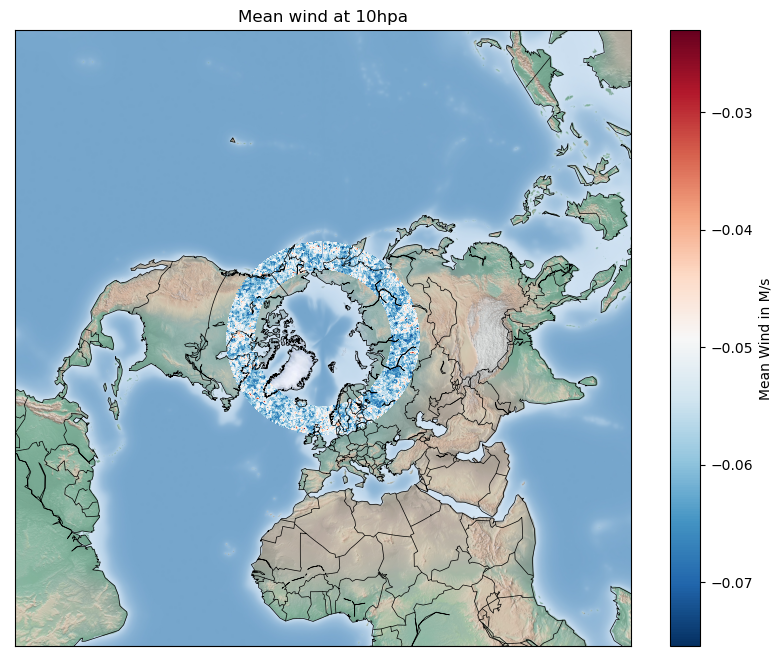

In [ ]:
# =============================================================================
# Plot data for testing (40km grid)
# =============================================================================

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/40_km_grid/mfx/2002-08-31_mfx.npz')['arr_0']
grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Mean wind at 10hpa')
plt.colorbar(label='Mean Wind in M/s')


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_5172/4188593221.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')


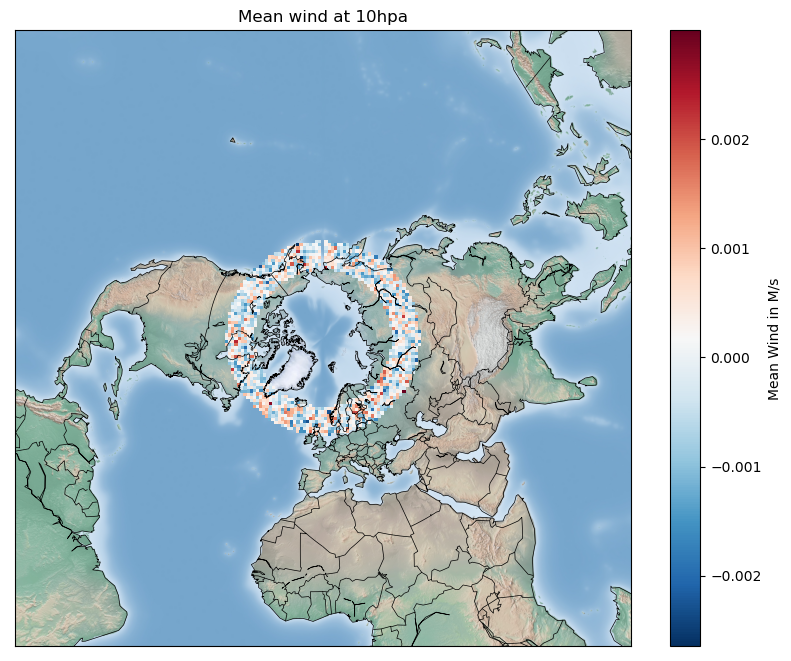

In [10]:
# =============================================================================
# Plot data for testing (40km grid)
# =============================================================================

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = np.load('processed_airs_sftp/125_km_grid/mfx/2002-08-31_mfx.npz')['arr_0']
grid = map_grid(grid_size='125', source='airs')
wizard = data_wizard()

fig = plt.figure(figsize=(10, 8))

m = Basemap(projection='npstere',boundinglat=0,lon_0=0,resolution='c')
m.shadedrelief(scale=0.5)

# use to plot areas in any section of the globe using a stereographic projection
# m = Basemap(projection='stere',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

m.pcolormesh(grid.nh_lon, grid.nh_lat, data,latlon=True, cmap='RdBu_r',shading='auto')
m.drawcoastlines(linewidth=0.5,linestyle='solid')
m.drawcountries(linewidth=0.5, linestyle='solid',color='k')


plt.title(f'Mean wind at 10hpa')
plt.colorbar(label='Mean Wind in M/s')
